In [2]:
'''🔹 Lasso Regression (L1 Regularization)

Definition: Lasso Regression is similar to Ridge but uses L1 regularization instead of L2.


Lasso can shrink some coefficients to exactly zero, effectively performing feature selection.

This makes it useful for datasets with many irrelevant features.

👉 Good when you want a sparse model (only important features kept).'''

'🔹 Lasso Regression (L1 Regularization)\n\nDefinition: Lasso Regression is similar to Ridge but uses L1 regularization instead of L2.\n\n\nLasso can shrink some coefficients to exactly zero, effectively performing feature selection.\n\nThis makes it useful for datasets with many irrelevant features.\n\n👉 Good when you want a sparse model (only important features kept).'

In [4]:
# Lasso Regression Example with Prediction & Graph
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_california_housing

# Load dataset
data = fetch_california_housing(as_frame=True)
df = data.frame

X = df.drop("MedHouseVal", axis=1)
y = df["MedHouseVal"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [6]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [8]:
# Train Lasso Regression model
lasso_model = Lasso(alpha=0.01, max_iter=10000)
lasso_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_lasso = lasso_model.predict(X_test_scaled)

# Evaluation
print("🔹 Lasso Regression")
print("MSE:", mean_squared_error(y_test, y_pred_lasso))
print("Accuracy (R² Score): {:.2f}%".format(r2_score(y_test, y_pred_lasso) * 100))



🔹 Lasso Regression
MSE: 0.5482548967938964
Accuracy (R² Score): 58.16%


In [10]:
# Custom prediction (example: first row of test data)
sample = X_test.iloc[0:1]
sample_scaled = scaler.transform(sample)
prediction = lasso_model.predict(sample_scaled)
print("\nCustom Input Prediction (Lasso):", prediction[0])




Custom Input Prediction (Lasso): 0.7878731186662495


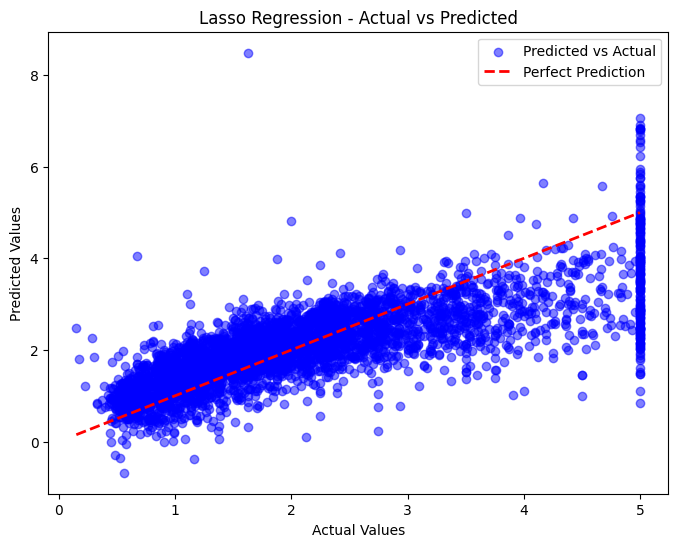

In [12]:
# ------------------------------------------------------
# Visualization: Actual vs Predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_lasso, alpha=0.5, color="blue", label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", lw=2, label="Perfect Prediction")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Lasso Regression - Actual vs Predicted")
plt.legend()
plt.show()
